In [3]:
# DO NOT RUN IF ALREADY INSTALLED
!pip install kagglehub


In [1]:
import kagglehub

# Download the latest version of the dataset
path = kagglehub.dataset_download("radheshyamkollipara/bank-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\bidia\.cache\kagglehub\datasets\radheshyamkollipara\bank-customer-churn\versions\1


In [2]:
# Path to dataset: C:\Users\bidia\.cache\kagglehub\datasets\radheshyamkollipara\bank-customer-churn\versions\1

In [25]:
#Finally import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
dataset = pd.read_csv(os.path.join(path, "Customer-Churn-Records.csv"))
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [5]:
filtered_data = dataset.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
filtered_data
data = filtered_data

In [6]:
# one-hot encode the data

onehotencoded = pd.get_dummies(data, dtype = "float")

onehot = OneHotEncoder()

In [7]:
onehotencoded

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,...,300,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,...,771,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9997,709,36,7,0.00,1,0,1,42085.58,1,1,...,564,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,...,339,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [10]:
normalizer = MinMaxScaler()
standardizer = StandardScaler()

data_stdized = pd.DataFrame(standardizer.fit_transform(onehotencoded), columns=onehotencoded.columns)

<AxesSubplot:>

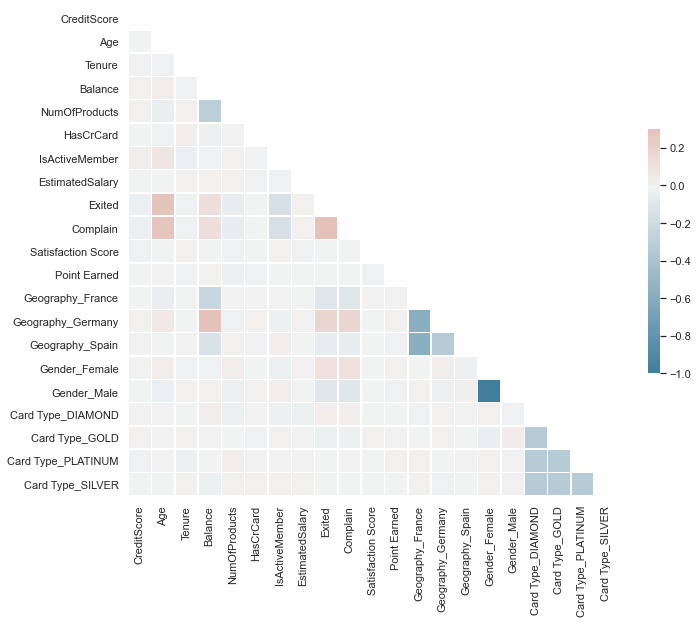

In [18]:
sns.set_theme(style="white")
# get correlation matrix
correlation_matrix = onehotencoded.corr()

# generate upper triangular mask
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# generate the heatmap
# sns.heatmap(correlation_matrix)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [24]:
data_ = onehotencoded

# Split data into train/test
X = data_.drop(columns=["Exited"])
y = data["Exited"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Find the better algorithm for this kind of classification problem

In [26]:
lg = LogisticRegression()

In [27]:
lg.fit(X_train, y_train)

LogisticRegression()

In [28]:
lg.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
lg.score(X_test, y_test)

0.799